In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

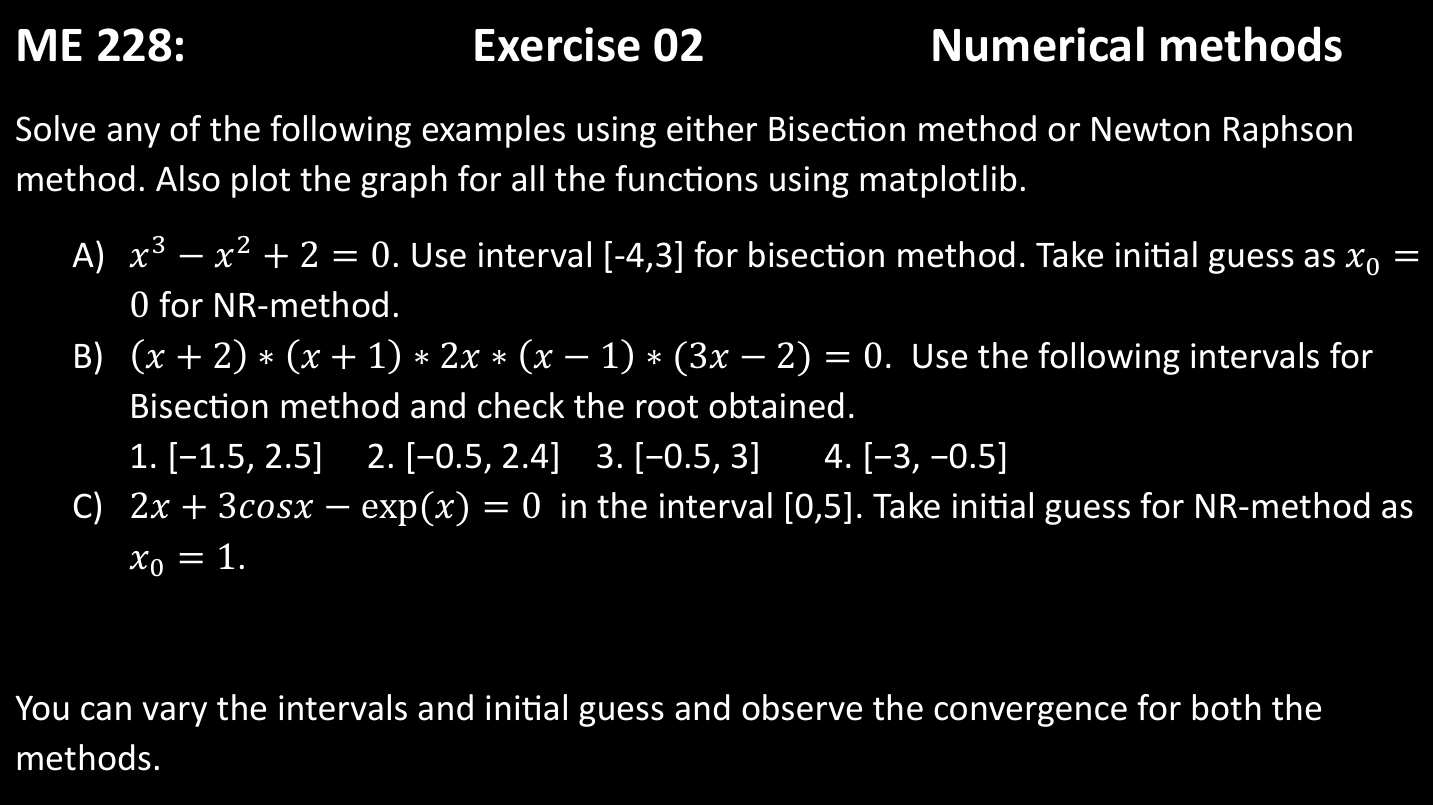

A) SOLVED USING BISECTION METHOD FIRST AND THEN NEWTON RAPHSON METHOD

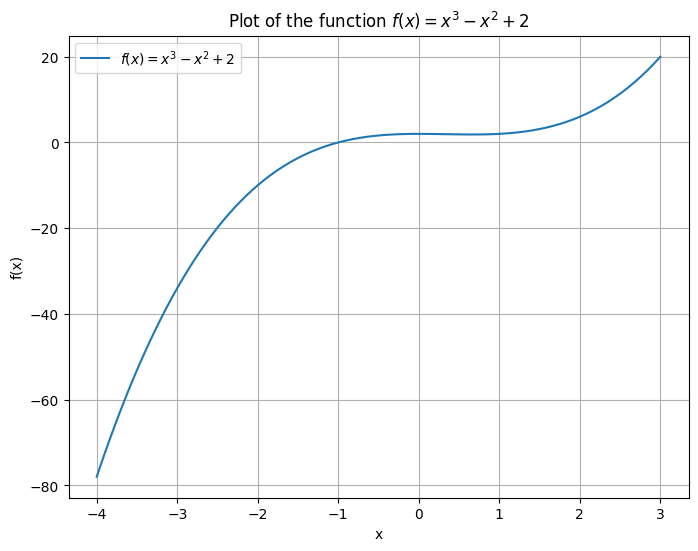

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function
def f(x):
    return x**3 - x**2 + 2

# Generate x values
x_values = np.linspace(-4, 3, 400)
# Generate y values
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = x^3 - x^2 + 2$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x) = x^3 - x^2 + 2$')
plt.grid(True)
plt.legend()
plt.show()


In [2]:
# Define the function for bisection method
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        print("Bisection method fails.")
        return None
    iter_count = 0
    while (b - a) / 2 > tol and iter_count < max_iter:
        c = (a + b) / 2
        if f(c) == 0:
            return c
        elif f(c) * f(a) < 0:
            b = c
        else:
            a = c
        iter_count += 1
    return (a + b) / 2

# Solve using Bisection method
root_bisection = bisection_method(f, -4, 3)
print("Root using Bisection method:", root_bisection)


Root using Bisection method: -1.0000005960464478


In [5]:
# Define the Newton-Raphson method with handling for zero derivative
def newton_raphson_safe(f, df, x0, tol=1e-6, max_iter=100):
    iter_count = 0
    while abs(f(x0)) > tol and iter_count < max_iter:
        if df(x0) == 0:
            x0 += tol  # Perturb the initial guess if derivative is zero
        x0 = x0 - f(x0) / df(x0)
        iter_count += 1
    return x0

# Solve using Newton-Raphson method with handling for zero derivative
root_newton_raphson = newton_raphson_safe(f, df, 0)
print("Root using Newton-Raphson method:", root_newton_raphson)


Root using Newton-Raphson method: -1.000000000009208


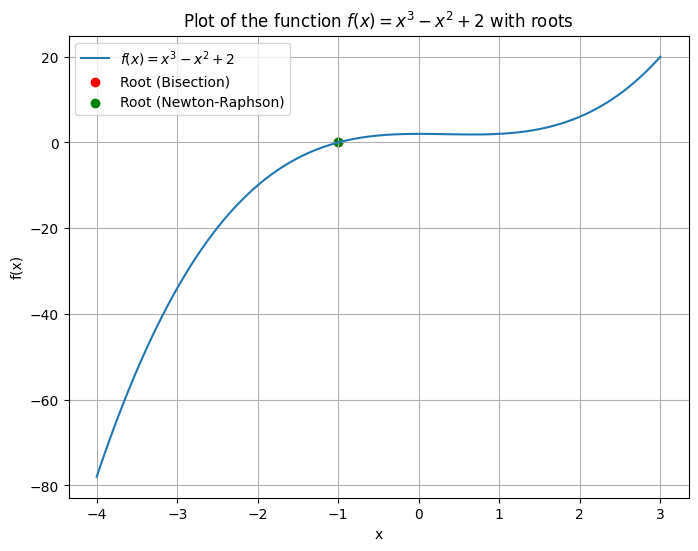

In [6]:
# Plot the function with roots
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = x^3 - x^2 + 2$')
plt.scatter(root_bisection, f(root_bisection), color='red', marker='o', label='Root (Bisection)')
plt.scatter(root_newton_raphson, f(root_newton_raphson), color='green', marker='o', label='Root (Newton-Raphson)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x) = x^3 - x^2 + 2$ with roots')
plt.grid(True)
plt.legend()
plt.show()


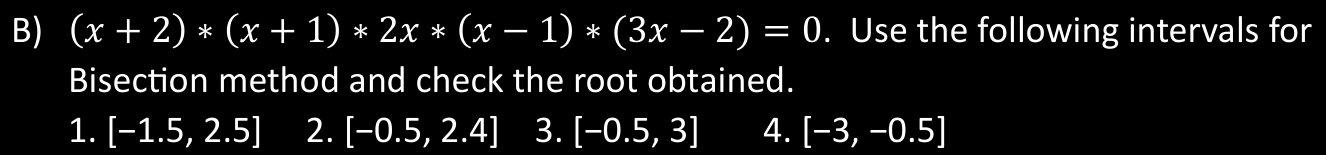

In [15]:
# Define the function
def f(x):
    return (x+2)*(x+1)*2*x*(x-1)*(3*x-2)

# Intervals for Bisection method
intervals = [(-1.5, 2.5), (-0.5, 2.4), (-0.5, 3), (-3, -0.5)]

# Tolerance for checking the root
tolerance = 1e-6

# Function to find the root using Bisection method
def bisection_method(a, b):
    if f(a)*f(b) > 0:
        print("Bisection method fails.")
        return None
    else:
        c = (a+b)/2
        while abs(b-a) > tolerance:
            if f(c) == 0:
                break
            elif f(a)*f(c) < 0:
                b = c
            else:
                a = c
            c = (a+b)/2
        return c

# Check the roots for each interval
for interval in intervals:
    a, b = interval
    root = bisection_method(a, b)
    if root is not None:
        print(f"Root for interval [{a}, {b}] is {root:.4f}")
        # Check the root
        if abs(f(root)) < tolerance:
            print(f"The root {root:.4f} is correct.")
        else:
            print(f"The root {root:.4f} is not correct.")
    else:
        print(f"No root found in interval [{a}, {b}].")

Bisection method fails.
No root found in interval [-1.5, 2.5].
Root for interval [-0.5, 2.4] is 1.0000
The root 1.0000 is correct.
Root for interval [-0.5, 3] is 0.0000
The root 0.0000 is not correct.
Bisection method fails.
No root found in interval [-3, -0.5].


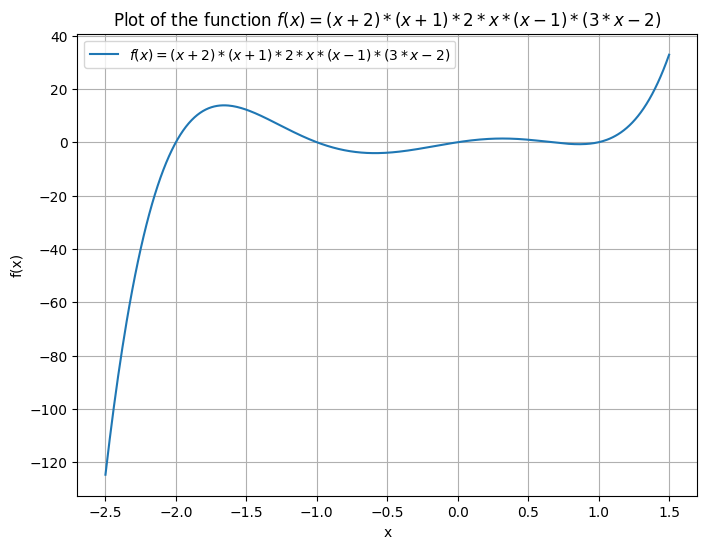

In [12]:
# Define the function
def f(x):
    return (x + 2) * (x + 1) * 2*x * (x - 1) * (3*x - 2)

# Generate x values
x_values = np.linspace(-2.5, 1.5, 400)
# Generate y values
y_values = f(x_values)

# Plot the function
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = (x + 2) * (x + 1) * 2*x * (x - 1) * (3*x - 2)$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of the function $f(x) = (x + 2) * (x + 1) * 2*x * (x - 1) * (3*x - 2)$')
plt.grid(True)
plt.legend()
plt.show()

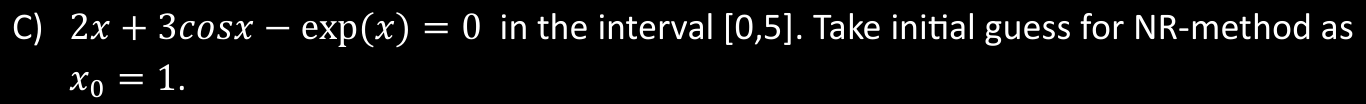

Iteration 1: x = 1.2784
Iteration 2: x = 1.2405
Iteration 3: x = 1.2397
Iteration 4: x = 1.2397
Iteration 5: x = 1.2397
Iteration 6: x = 1.2397
Iteration 7: x = 1.2397
Iteration 8: x = 1.2397
Iteration 9: x = 1.2397
Iteration 10: x = 1.2397


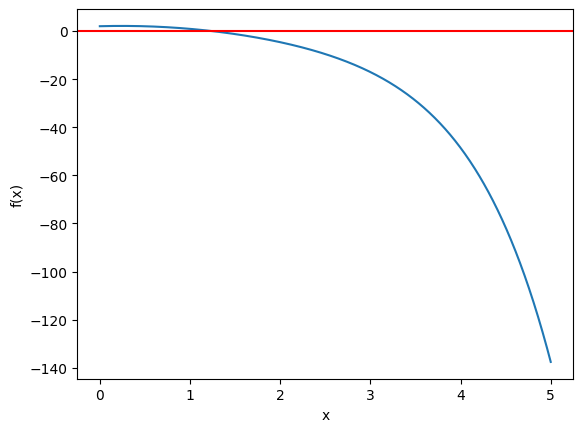

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function and its derivative
def f(x):
    return 2*x + 3*np.cos(x) - np.exp(x)

def fp(x):
    return 2 - 3*np.sin(x) - np.exp(x)

# Apply Newton-Raphson method
x = 1.0
for i in range(10):
    x = x - f(x)/fp(x)
    print(f"Iteration {i+1}: x = {x:.4f}")

# Plot the function
x_vals = np.linspace(0, 5, 1000)
y_vals = f(x_vals)
plt.plot(x_vals, y_vals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

# **Bisection Method:**

The Bisection method is a simple and effective root-finding algorithm, but it does have some limitations. One limitation is that it requires a bracketed interval, meaning that the function must have opposite signs at the endpoints of the interval. If the function does not change sign in the interval, then the method cannot be applied.

Another limitation of the Bisection method is that it can be slow to converge. The method always cuts the interval in half, so the width of the interval decreases linearly with the number of iterations. This means that the number of correct decimal places doubles with each iteration, which can be slow for functions with many roots or for functions that are difficult to evaluate.

# **Newton-Raphson Method:**

The Newton-Raphson method is a powerful root-finding algorithm, but it also has some limitations. One limitation is that it requires the derivative of the function, which may not always be available or easy to compute.

Another limitation of the Newton-Raphson method is that it can be sensitive to the initial guess. If the initial guess is not close to the root, the method can diverge or converge to the wrong root. This can be a particular problem for functions with multiple roots or for functions that have complex behavior near the root.

Additionally, the Newton-Raphson method can overshoot the root if the function is not locally linear. This can cause the method to oscillate or diverge, especially if the derivative is large or changes rapidly near the root.

In general, both methods are powerful tools for root finding, but they should be used with caution and an understanding of their limitations. It's important to choose the right method for the problem at hand and to carefully analyze the behavior of the function near the root.